In [211]:

import pmdarima as pm
from pmdarima.datasets import load_wineind
import warnings
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy
%matplotlib inline 
from matplotlib.pylab import rcParams 
import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose
# import pyramid as pm
from sklearn import metrics 
from pmdarima import auto_arima
from functools import reduce
from scipy.optimize import minimize
import numpy as np
from pandas.tseries.offsets import CustomBusinessMonthBegin


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [212]:
# # Dependencies and Setupjj
# %matplotlib inline
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from functools import reduce
# from scipy.optimize import minimize

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File scruboad (Remember to Change These)
data_to_load1 = "Data/Raw Data/KL.csv"
data_to_load2 = "Data/Raw Data/RH.csv"
data_to_load3 = "Data/Raw Data/CPRT.csv"
data_to_load4 = "Data/Raw Data/MTZ.csv"
data_to_load5 = "Data/Raw Data/ESNT.csv"
data_to_load6 = "Data/Raw Data/EW.csv"
data_to_load7 = "Data/Raw Data/EDU.csv"
data_to_load8 = "Data/Raw Data/PAYC.csv"
data_to_load9 = "Data/Raw Data/CDW.csv"
data_to_load10 = "Data/Raw Data/LULU.csv"
data_to_load11 = "Data/Raw Data/VEEV.csv"


KL = pd.read_csv(data_to_load1)
RH = pd.read_csv(data_to_load2)
CPRT = pd.read_csv(data_to_load3)
MTZ = pd.read_csv(data_to_load4)
ESNT = pd.read_csv(data_to_load5)
EW = pd.read_csv(data_to_load6)
EDU = pd.read_csv(data_to_load7)
PAYC = pd.read_csv(data_to_load8)
CDW = pd.read_csv(data_to_load9)
LULU = pd.read_csv(data_to_load10)
VEEV = pd.read_csv(data_to_load11)


In [213]:
# Insert stock labels 
KL['Stock']='KL'
LULU['Stock']='LULU'
CPRT['Stock']='CPRT'
ESNT['Stock']='ESNT'
MTZ['Stock']='MTZ'
RH['Stock']='RH'
VEEV['Stock']='VEEV'
EW['Stock']='EW'
CDW['Stock']='CDW'
EDU['Stock']='EDU'

PAYC['Stock']='PAYC'




In [214]:
# Set new port
KL=PAYC

In [215]:
KL.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
1389,2019-10-21,204.940002,207.660004,202.009995,206.029999,206.029999,330500,PAYC
1390,2019-10-22,206.600006,208.089996,189.210007,190.600006,190.600006,799200,PAYC
1391,2019-10-23,190.000000,197.470001,189.440002,194.610001,194.610001,756500,PAYC
1392,2019-10-24,196.779999,204.149994,196.740005,203.500000,203.500000,485500,PAYC
1393,2019-10-25,204.729996,210.440002,202.544998,209.669998,209.669998,535600,PAYC


In [216]:
# isolate Adj Close for analysis
KL2 = KL['Adj Close'].dropna().rename(columns={'Adj Close':'Adj_Close'}, inplace = True)

In [217]:
# Get new row count after nulls to ensure accruacy
KL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1.394000e+03
mean,79.153294,80.384598,77.850146,79.200244,79.200244,6.155430e+05
std,62.329358,63.168757,61.336692,62.305999,62.305999,5.327917e+05
min,12.340000,12.620000,12.280000,12.410000,12.410000,1.330000e+04
25%,34.630001,35.361249,34.165000,34.752499,34.752499,3.461750e+05
50%,51.120001,51.784500,50.535000,51.305001,51.305001,5.299000e+05
75%,110.000000,111.499998,108.559999,110.137502,110.137502,7.340500e+05
max,257.989990,259.709991,253.490005,255.100006,255.100006,8.190100e+06


In [218]:
KL2.describe()

count    1394.000000
mean       79.200244
std        62.305999
min        12.410000
25%        34.752499
50%        51.305001
75%       110.137502
max       255.100006
dtype: float64

In [219]:
# Flip to wide format for lognormal returns
# KL2 = KL[('Stock','Date','Adj Close')]
# KL2 = KL[['Date', 'Adj Close','Stock']].rename(columns={'Adj Close':'Adj_Close'})
# KL2.to_csv('KL2.csv')

In [220]:
# cHECK FOR NonStat p >.05 means yes
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(KL2.dropna())
# result = adfuller(KL2.Adj_Close.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.513498
p-value: 0.985278


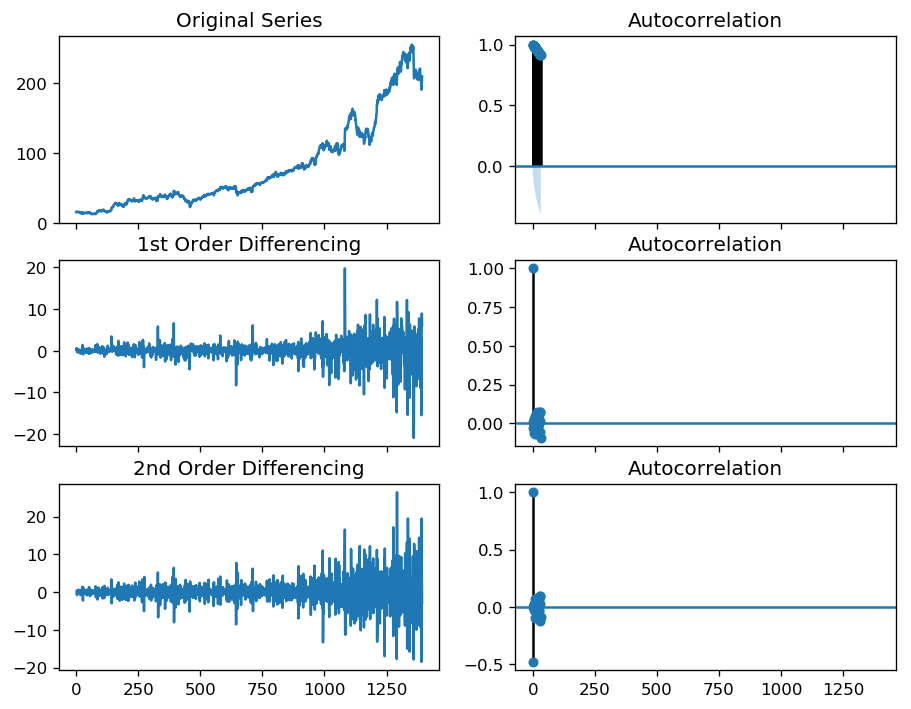

In [221]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(KL2); axes[0, 0].set_title('Original Series')
plot_acf(KL2, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(KL2.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(KL2.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(KL2.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(KL2.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [222]:

# this is a dataset from R
KL3 = KL2.astype(np.float64)

# fit stepwise auto-ARIMA
stepwise_fit = pm.auto_arima(KL3, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
#                              maxiter=5000,
#                              out_of_sample_size =252,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                              stepwise=True)  # set to stepwise
 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=6458.525, BIC=6484.678, Fit time=8.630 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=7298.004, BIC=7308.465, Fit time=0.189 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=6928.395, BIC=6949.317, Fit time=1.401 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=6457.519, BIC=6478.441, Fit time=3.166 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=6459.302, BIC=6485.455, Fit time=4.462 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=7299.156, BIC=7314.847, Fit time=0.450 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=6459.303, BIC=6485.456, Fit time=9.985 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=6461.509, BIC=6492.892, Fit time=10.371 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=6455.745, BIC=6471.437, Fit time=2.410 seconds
Fit ARIMA: order=(0, 1, 0) 

In [223]:
# stepwise_fit.summary()

In [224]:
# model_fit = stepwise_fit.summary()
# print(stepwise_fit.summary())

In [225]:
import numpy as np
import pmdarima as pm
from pmdarima.datasets import load_wineind

# this is a dataset from R
wineind = load_wineind().astype(np.float64)
stepwise_fit.resid()

array([15.34760495,  0.26760495,  0.62760495, ...,  3.7038763 ,
        8.78973049,  5.81349186])

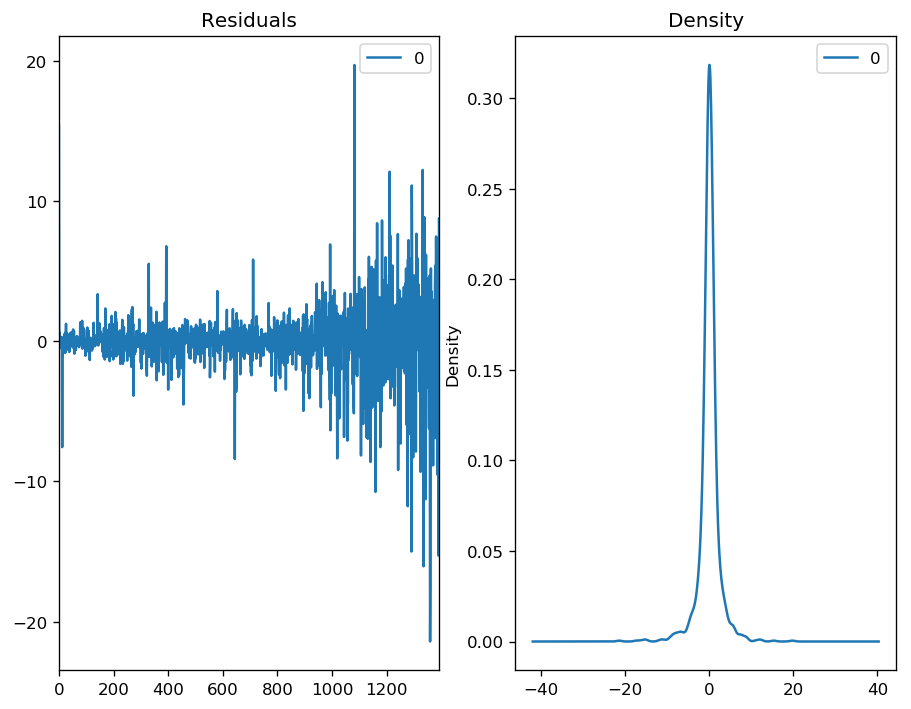

In [226]:
residuals = pd.DataFrame(stepwise_fit.resid())
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [227]:
GV= KL.dropna()
GV2 = GV[['Date','Adj Close', 'Stock']]
GV2['Residuals'] = residuals
GV3 = GV2.rename(columns={"Adj Close": "Adj_Close"})
GV3

,Date,Adj_Close,Stock,Residuals
0,2014-04-15,15.350000,PAYC,15.347605
1,2014-04-16,15.620000,PAYC,0.267605
2,2014-04-17,16.250000,PAYC,0.627605
3,2014-04-21,16.100000,PAYC,-0.152395
4,2014-04-22,15.980000,PAYC,-0.122395
5,2014-04-23,16.070000,PAYC,0.087605
6,2014-04-24,15.750000,PAYC,-0.322395
7,2014-04-25,15.300000,PAYC,-0.452395
8,2014-04-28,14.970000,PAYC,-0.332395
9,2014-04-29,15.280000,PAYC,0.307605


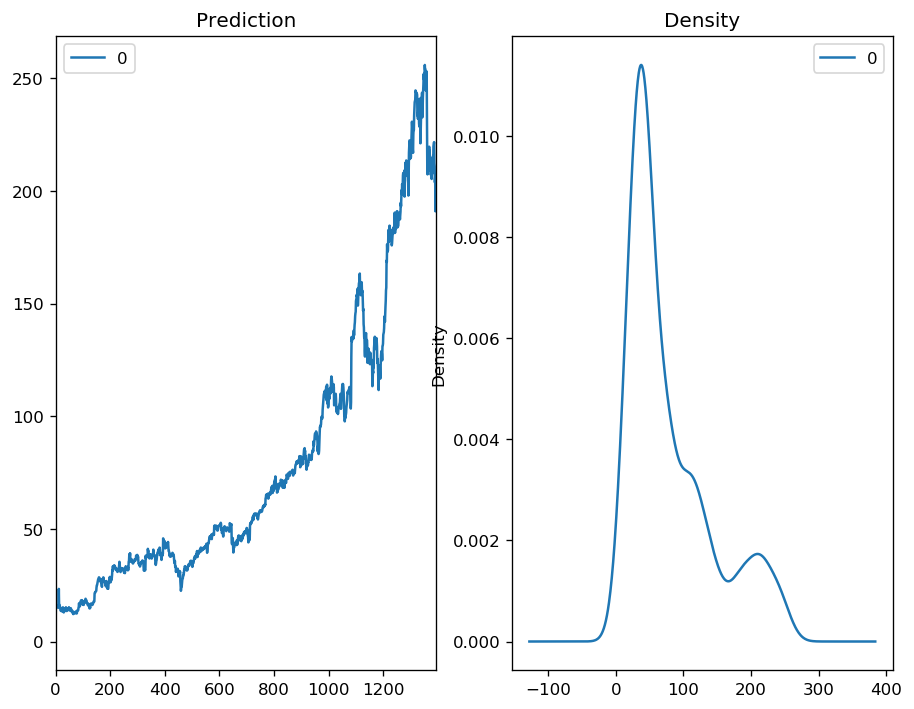

In [228]:
# Model Check - Combine w\ orginal    Adj & Prediction
predict = pd.DataFrame(stepwise_fit.predict_in_sample(dynamic=False))
fig, ax = plt.subplots(1,2)
predict.plot(title="Prediction", ax=ax[0])
predict.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [229]:
data=stepwise_fit.predict_in_sample(dynamic=False).tolist()
plt.show()

In [230]:
dfObj = pd.DataFrame(data, columns = ['Value']) 

In [231]:
# dfObj.to_csv('data.csv')

In [232]:
train2 = int(np.ceil(len(dfObj)*.75))
# test2 = len(dfObj)-train2


## Predictions

In [233]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = dfObj.Value[:train2]
test = dfObj.Value[train2:]

In [234]:
Forecast=int(len(test))

In [235]:
KL2.head()

0    15.35
1    15.62
2    16.25
3    16.10
4    15.98
dtype: float64

In [236]:

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = stepwise_fit
# ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(KL2)  

# Forecast
fc, conf = fitted.predict(n_periods=len(test),return_conf_int=True, alpha=0.05)  # 95% conf



In [237]:
print(fitted.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 1394
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood               -3224.873
Date:                            Sun, 27 Oct 2019   AIC                           6455.745
Time:                                    21:37:06   BIC                           6471.437
Sample:                                         0   HQIC                          6461.615
                                           - 1394                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0024      0.002      1.437      0.151      -0.001       0.006
ma.S.L12      -0.9846      0.008   

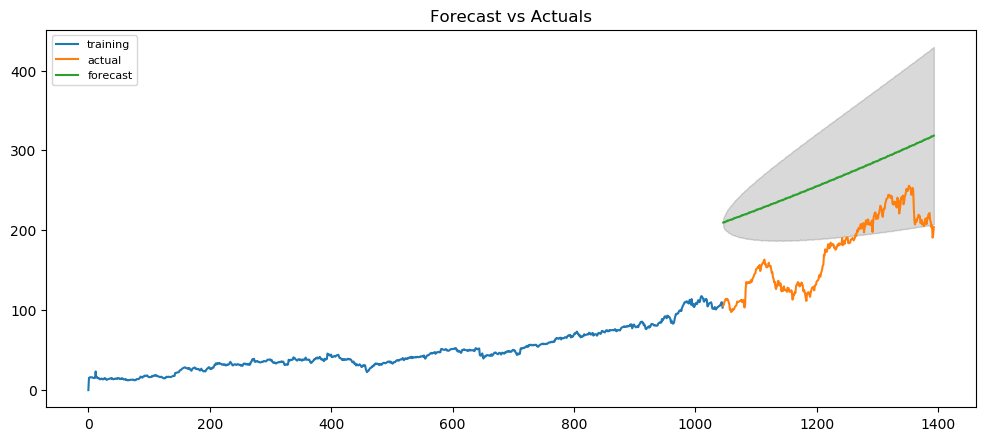

In [238]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [239]:
df6=fc.tolist()
df6

[209.85155686797313,
 210.15236348618058,
 209.8509420156069,
 210.35731597138553,
 210.94433604667174,
 210.99118414655302,
 211.543701063239,
 212.3461862013299,
 211.95348826982692,
 212.3223101002259,
 212.56809177229601,
 213.02149189695373,
 213.2054458194743,
 213.50864749222916,
 213.2096210762029,
 213.71839008652896,
 214.30780521636257,
 214.35704837079135,
 214.9119603420247,
 215.71684053466305,
 215.3265376577075,
 215.69775454265388,
 215.94593126927145,
 216.40172644847658,
 216.58807542554456,
 216.89367215284685,
 216.59704079136804,
 217.1082048562415,
 217.70001504062253,
 217.75165324959872,
 218.30896027537955,
 219.1162355225653,
 218.72832770015714,
 219.10193963965094,
 219.35251142081592,
 219.8107016545685,
 219.99944568618392,
 220.30743746803364,
 220.01320116110224,
 220.52676028052315,
 221.12096551945163,
 221.17499878297522,
 221.73470086330343,
 222.5443711650366,
 222.1588583971759,
 222.53486539121715,
 222.78783222692954,
 223.24841751522956,
 223.4

In [240]:
df6

[209.85155686797313,
 210.15236348618058,
 209.8509420156069,
 210.35731597138553,
 210.94433604667174,
 210.99118414655302,
 211.543701063239,
 212.3461862013299,
 211.95348826982692,
 212.3223101002259,
 212.56809177229601,
 213.02149189695373,
 213.2054458194743,
 213.50864749222916,
 213.2096210762029,
 213.71839008652896,
 214.30780521636257,
 214.35704837079135,
 214.9119603420247,
 215.71684053466305,
 215.3265376577075,
 215.69775454265388,
 215.94593126927145,
 216.40172644847658,
 216.58807542554456,
 216.89367215284685,
 216.59704079136804,
 217.1082048562415,
 217.70001504062253,
 217.75165324959872,
 218.30896027537955,
 219.1162355225653,
 218.72832770015714,
 219.10193963965094,
 219.35251142081592,
 219.8107016545685,
 219.99944568618392,
 220.30743746803364,
 220.01320116110224,
 220.52676028052315,
 221.12096551945163,
 221.17499878297522,
 221.73470086330343,
 222.5443711650366,
 222.1588583971759,
 222.53486539121715,
 222.78783222692954,
 223.24841751522956,
 223.4

In [241]:
model.fit(KL2)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [242]:
model

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [243]:
# model.fit?

In [244]:
# fitted.predict?

In [245]:
# KL3, start_p=1, start_q=1,
#                              max_p=3, max_q=3, m=12,
#                              start_P=0, seasonal=True,
#                              d=1, D=1, trace=True,
#                              maxiter=5000,
#                              out_of_sample_size =252,
#                              error_action='ignore',  # don't want to know if an order does not work
# #                              suppress_warnings=True,  # don't want convergence warnings
#                              stepwise=True)  # set to stepwise
 

In [246]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(KL3, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=6458.525, BIC=6484.678, Fit time=9.248 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=7298.004, BIC=7308.465, Fit time=0.127 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=6928.395, BIC=6949.317, Fit time=1.760 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=6457.519, BIC=6478.441, Fit time=4.126 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=6459.302, BIC=6485.455, Fit time=4.527 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=7299.156, BIC=7314.847, Fit time=0.504 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=6459.303, BIC=6485.456, Fit time=10.719 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=6461.509, BIC=6492.892, Fit time=9.698 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=6455.745, BIC=6471.437, Fit time=2.203 seconds
Fit ARIMA: order=(0, 1, 0) 

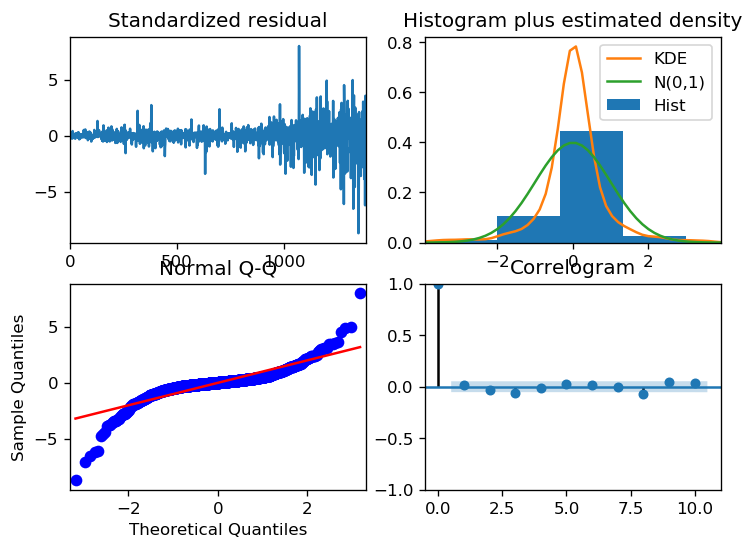

In [247]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

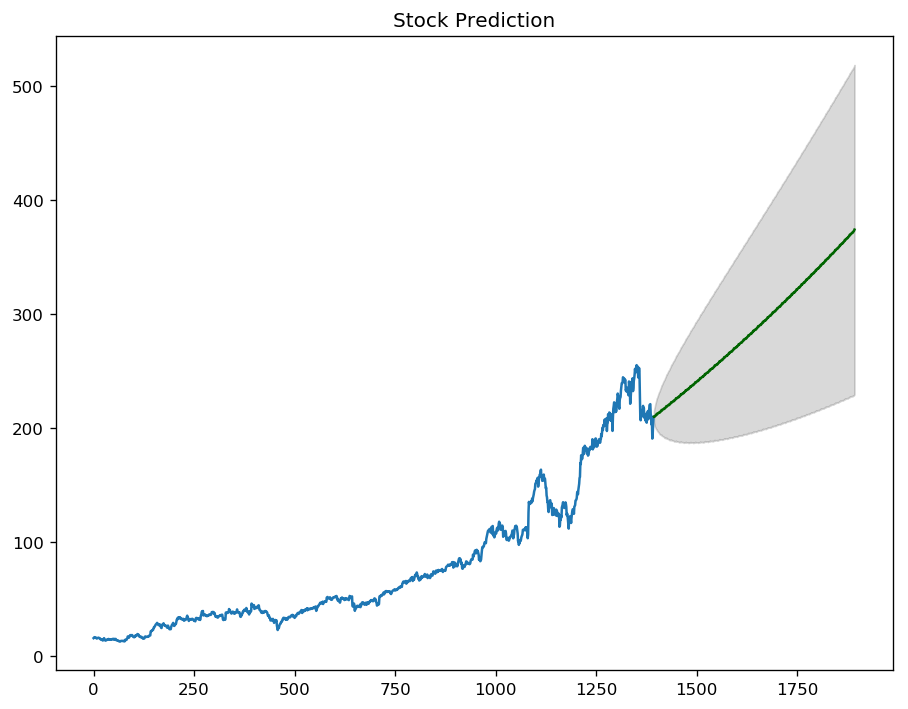

In [248]:
# Forecast
n_periods = 500
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(KL3), len(KL3)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(KL3)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Stock Prediction")
plt.show()

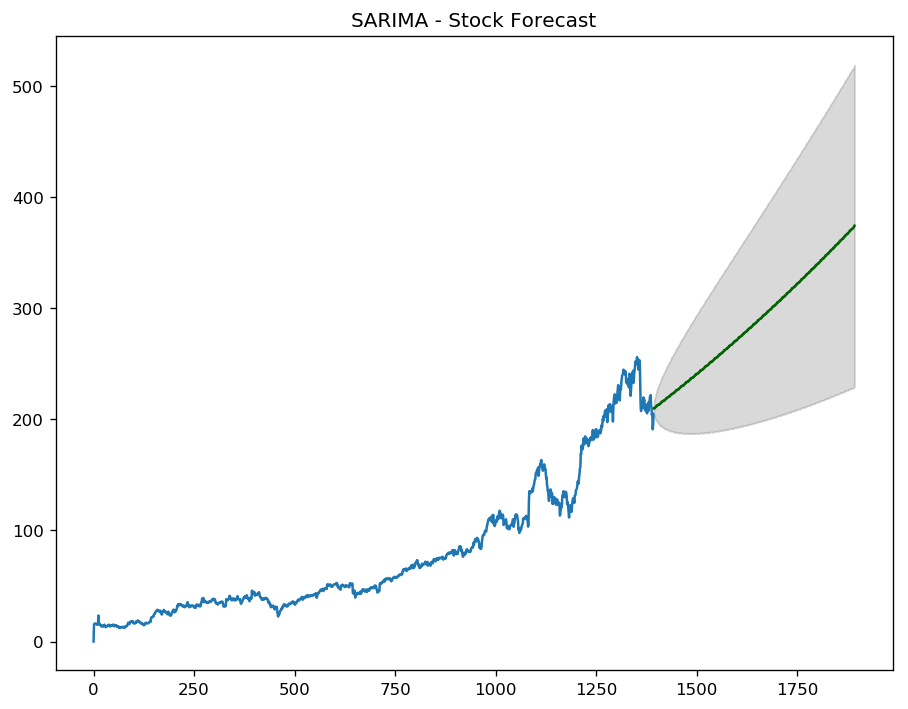

In [249]:
# Forecast
n_periods = 500
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
# index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Stock Forecast")
plt.show()

In [250]:
# fitted_series

In [252]:
dfObj.to_csv('PAYC_Pred.csv')

In [253]:
fitted_series.to_csv('PAYC_Fore.csv')
# CPRT